In [55]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

%matplotlib inline

In [56]:
images = glob.glob('camera_cal/calibration*.jpg')

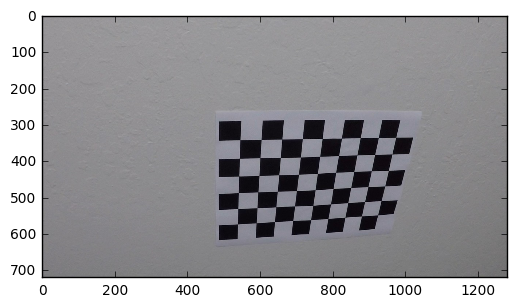

In [57]:
plt.imshow(cv2.imread(images[0])[:,:,::-1])  # had problem with cv2.imshow

In [58]:
len(images)

20

In [59]:
# chessboard dimensions
cb_width = 9
cb_height = 6

In [60]:
objp = np.concatenate([np.mgrid[0:cb_width, 0:cb_height].T.reshape(-1,2), np.zeros((cb_width*cb_height,1))], axis=1)

corner not found for camera_cal/calibration1.jpg
corner not found for camera_cal/calibration5.jpg
corner not found for camera_cal/calibration4.jpg


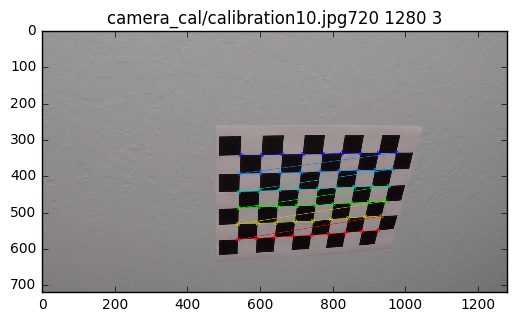

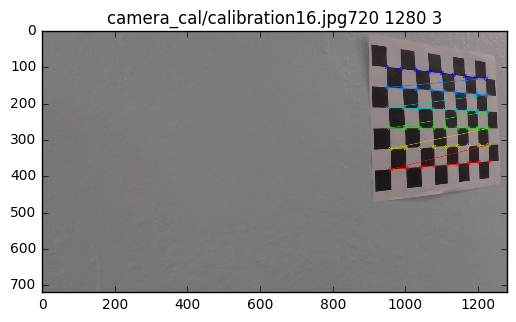

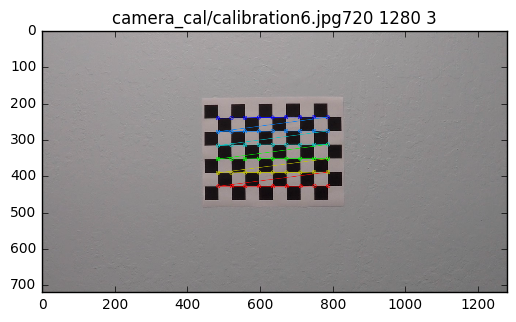

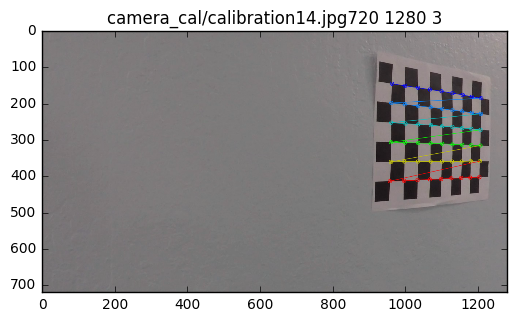

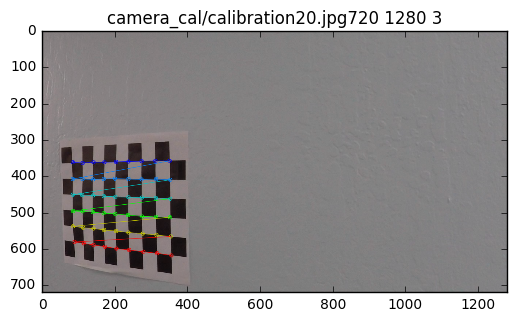

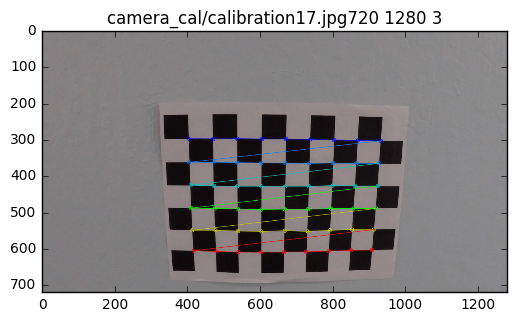

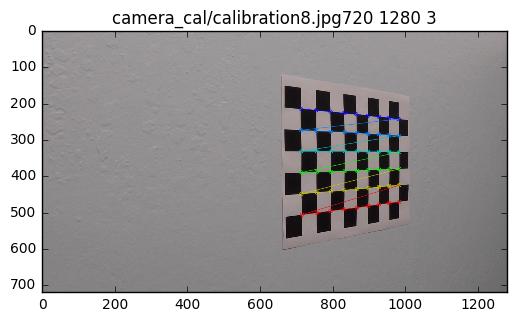

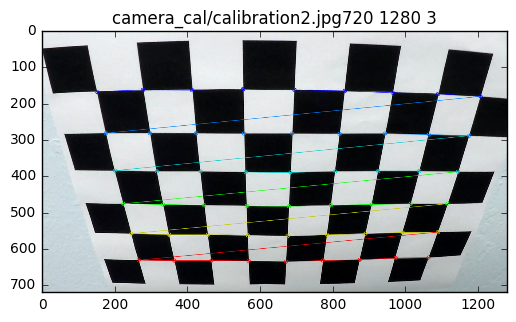

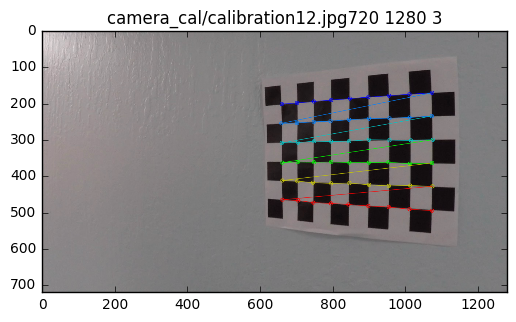

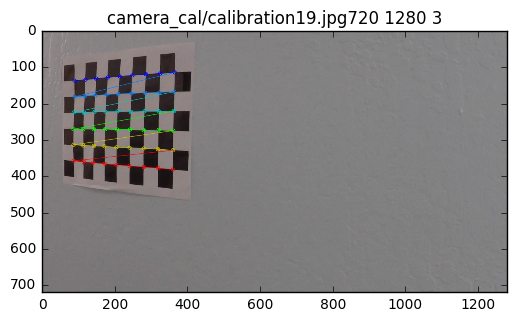

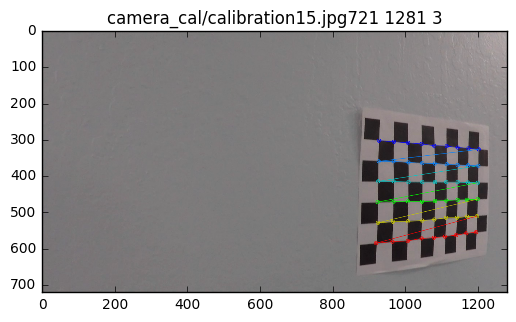

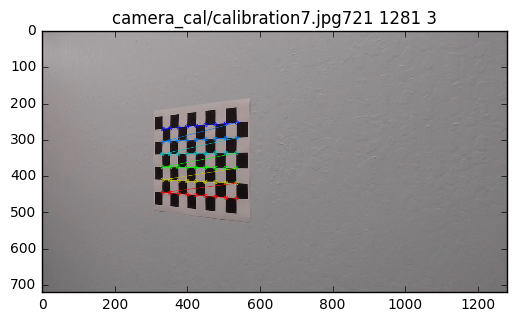

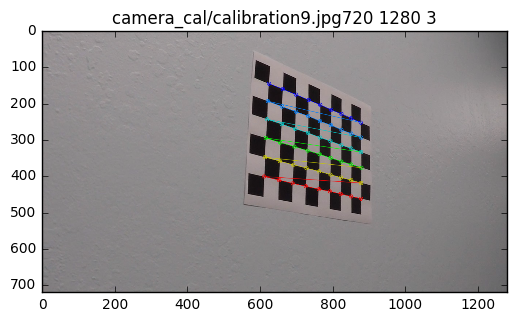

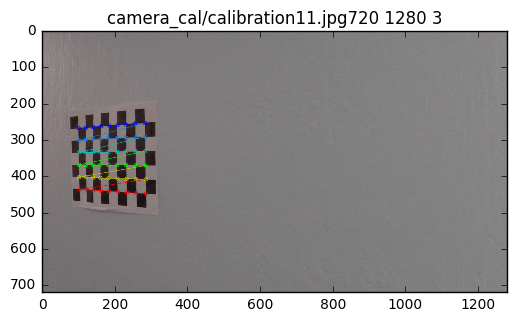

In [61]:
objpoints = []
imgpoints = []

for f in images[:-3]:
    img = cv2.imread(f)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (cb_width, cb_height), None)
    if ret:
        objpoints.append(objp.astype(np.float32)) # opencv breaks if it is the default float64
        imgpoints.append(corners)
        cv2.drawChessboardCorners(img, (cb_width, cb_height), corners, ret)
        plt.figure()
        plt.imshow(img)
        plt.title(f + ' '.join(str(x) for x in img.shape))
    else:
        print('corner not found for', f)

In [62]:
img_size = (1280, 720)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

In [63]:
import pickle
with open('distort_calibration.pickle','wb') as f:
    pickle.dump({'dist':dist, 'mtx':mtx}, f)

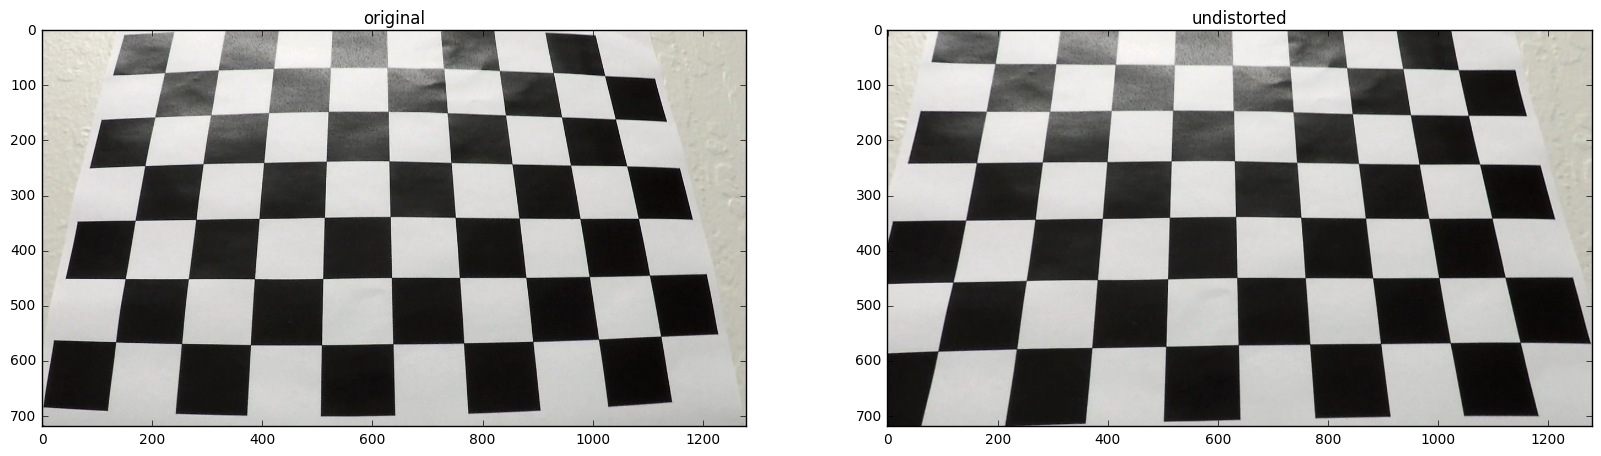

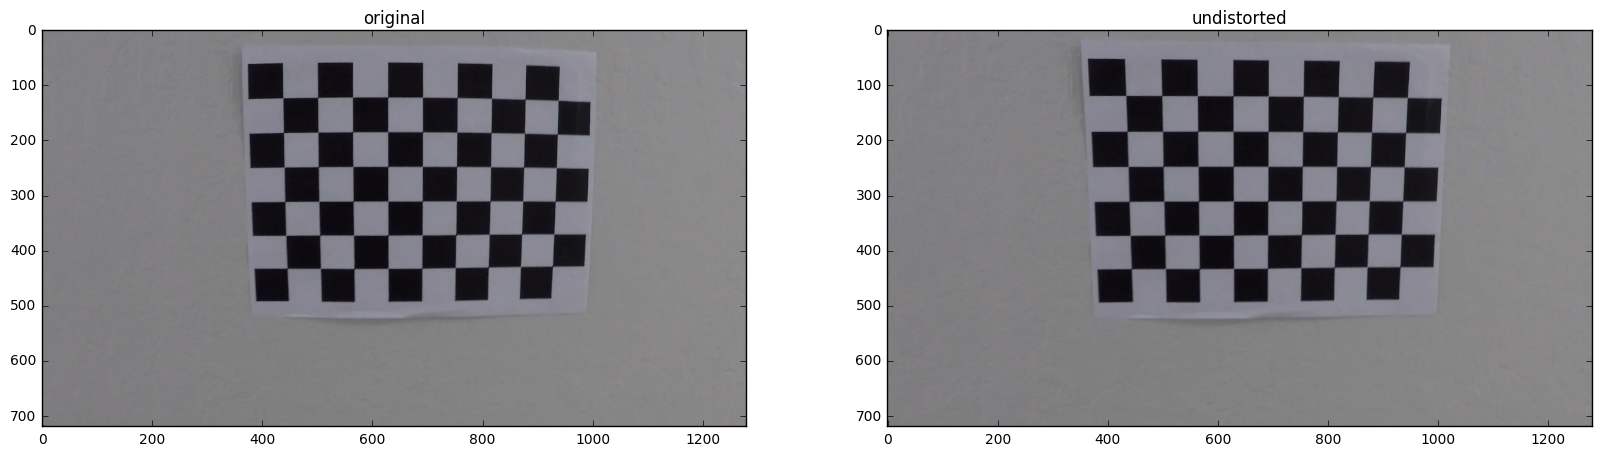

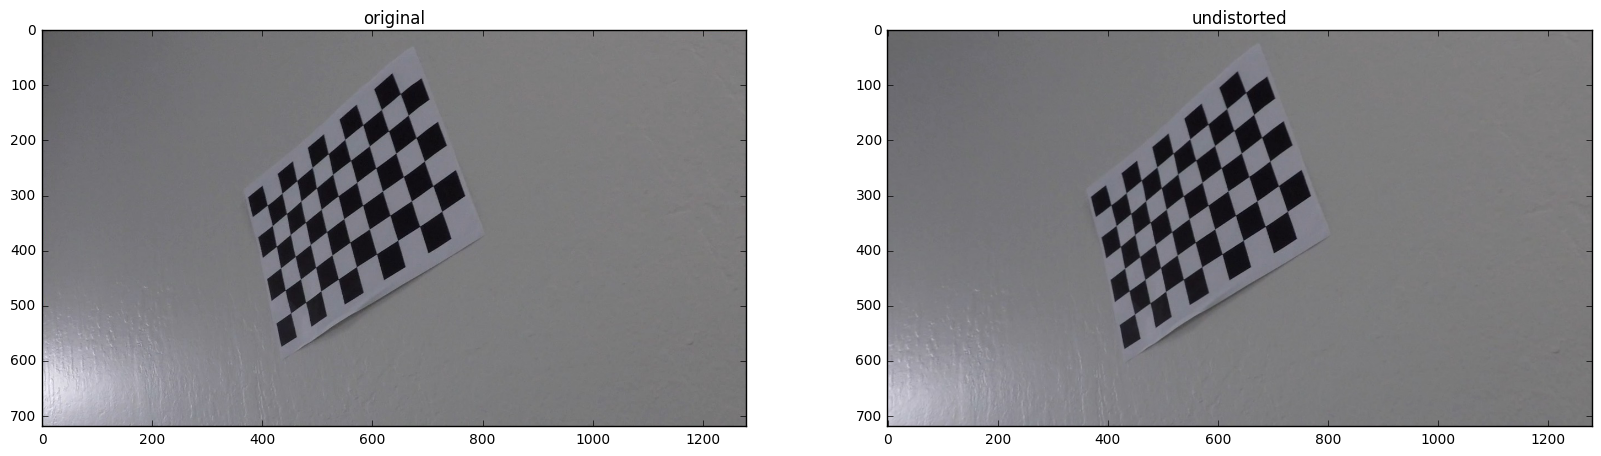

In [64]:
for f in images[-3:]:
    img = cv2.imread(f)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.imshow(img[:,:,::-1])
    plt.title('original')
    plt.subplot(1,2,2)
    plt.imshow(dst[:,:,::-1])
    plt.title('undistorted')
    

In [65]:
dist

array([[-0.20945801, -0.20487857, -0.00190785, -0.00068292,  0.22317514]])